# Question 3
By generating 10,000 searches, carry out a simulation experiment for a search engine going through a list of sites for a given key phrase, until the key phrase is found. You should allow your program to input the probability p that any site will contain the key phrase.

- Plot the simulated pdf and calculate its mean and variance, and
- Obtain the simulated conditional distribution of searches when three searches have been carried out without success. Calculate its mean and variance, and satisfy yourself that they are equivalent to the simulated distribution of the complete set.

As test data assume each site has a 60% chance of containing the key phrase. To satisfy yourself that the Markov memoryless property holds, obtain estimates of

P(X = 4|X > 3) and P(X = 1)

P(X = 5|X > 3) and P(X = 2)

where X is the number of searches to the first success


In [2]:
from scipy.stats import geom
import numpy as np
import matplotlib.pyplot as plt

#### Generate 10,000 searches

Enter probability parameter p = 0.6


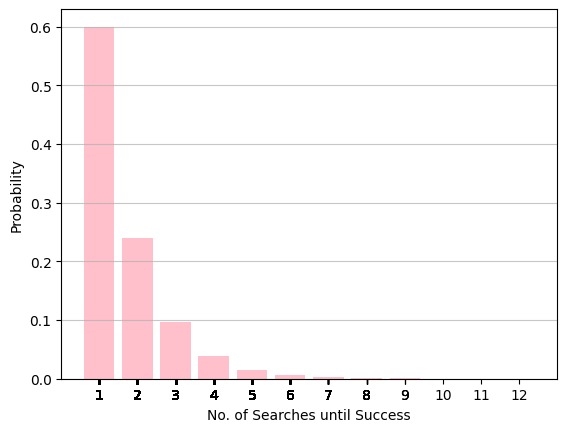

In [9]:
p = float(input(f"Enter probability parameter p = "))

# searches simulation
searches = np.random.geometric(p,10000)
# plot
pdf = geom.pmf(searches, p)
plt.bar(searches, pdf, color="pink")
plt.xlabel('No. of Searches until Success')
plt.ylabel('Probability')
plt.xticks(searches)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()


#### Mean and Variance

In [19]:
# mean and variance
mean_theory = 1/p
var_theory = (1-p)/p**2
mean_searches = np.mean(searches)
var_searches = np.var(searches)


print(f"Theoretical Mean: {round(mean_theory,2)} \nTheoretical Variance: {round(var_theory,2)}")
print(f"\nMean: {round(mean_searches,2)} \nVariance: {round(var_searches,2)}")



Theoretical Mean: 1.67 
Theoretical Variance: 1.11

Mean: 1.65 
Variance: 1.08


#### Conditional distribution when 3 searches failed

In [17]:
# conditional prob p(x>3)

tosuccess = searches +1
subset_xgt3 = searches[searches > 3] - 3
mean_cond = np.mean(subset_xgt3)
var_cond = np.var(subset_xgt3)

print(f"Mean P(X>3): {round(mean_cond, 2)} \nVariance P(X>3): {round(var_cond,2)}")

Mean P(X>3): 1.65 
Variance P(X>3): 1.11


**Remarks: It can be observed that there isn’t a a lot of difference between the two sets of parameters. Therefore, the subset can be referred to as a representative of the full set or the original distribution. The obtained values are also very close to theoretical values, as shown.**

#### Markov Memoryless Property

According to the Markov property of geometric distribution: \
if X a geometric random variable, then for each integer n: **P(X = x+n | X > n) = P(X = x)**

Recall: P(X = x) = q^(x−1) * p

1. P(X = 4|X > 3) and P(X = 1) In this case, x=1 and n=3.

We must take the number of instances 

In [14]:
# theoretical
theory = (1 - p)**0 * p


p_xgt3 = searches[searches>3]
p_x4 = searches[searches == 4]
p_x4_xgt3 = len(p_x4) /len(p_xgt3)


x1 = searches[searches == 1]
p_x1 = len(x1) / 10000


print(f"P(X = 4|X > 3) = {round(p_x4_xgt3,2)} \nP(X = 1) = {round(p_x1,2)}")
print(f"\nTheoretical value of P(X = x): {theory}.")

P(X = 4|X > 3) = 0.61 
P(X = 1) = 0.6

Theoretical value of P(X = x): 0.6.


**Remark: Because the two probabilities are nearly similar, we can say that the Markov property holds. The values are also near the theoretical value as shown.**

2. P(X = 5|X > 3) and P(X = 2) In this case, x=2 and n=3.

In [15]:
# theoretical
theory = (1 - p)**1 * p

p_x5 = searches[searches == 5]
p_x5_xgt3 = len(p_x5) /len(p_xgt3)

x2 = searches[searches == 2]
p_x2 = len(x2)/10000

print(f"P(X = 5|X > 3) = {round(p_x5_xgt3,2)} \nP(X = 2) = {round(p_x2,2)} ")
print(f"\nTheoretical value of P(X = x): {theory}.")


P(X = 5|X > 3) = 0.22 
P(X = 2) = 0.24 

Theoretical value of P(X = x): 0.24.


**Remark: Because the two probabilities are nearly similar, we can say that the Markov property holds. The values are also near the theoretical value as shown.**